In [4]:
%load_ext autoreload
%autoreload 2

import network
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from numba import jit

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Aufgabe 3
Berechne die relative Perkolationscluster größe für 160 verschiedene $p$ zwischen 59,4% und 65% mit $L=2^{13}$ und trage diese über $(p-p_c)^{5/36}$ auf.

In [14]:
@jit()
def get_relative_size_of_largest_percolating_cluster(net: network.Network):
    return net.N[net.get_largest_percolating_cluster()] / net.get_total_occupied_spots()

@jit()
def calc_size(ps):
    L=2**13
    PL = []
    for p in ps:
        net = network.Network(L, L, p)
        net.hoshen_kopelman()
        while not net.is_percolating():
            net = network.Network(L, L, p)
            net.hoshen_kopelman()
        PL.append(get_relative_size_of_largest_percolating_cluster(net))
    return PL
    
pc = 0.593
ps = np.linspace(pc+0.001, 0.65, 160)
beta = 5.0 / 36.0
PL = calc_size(ps)


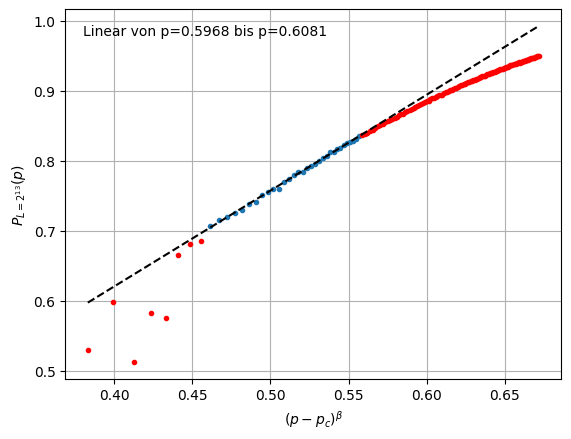

In [24]:
i = 8
j = 40
x = ((ps - pc)**beta)
l = stats.linregress(x[i:j], PL[i:j])
fig, ax = plt.subplots()
ax.plot(x[i:j], PL[i:j], '.')
ax.plot(x[:i], PL[:i], '.r')
ax.plot(x[j:], PL[j:], '.r')
x = np.array([x[0], x[-1]])
ax.plot(x, x*l.slope + l.intercept, 'k--')
ax.set_xlabel('$(p-p_c)^\\beta$')
ax.set_ylabel('$P_{L=2^{13}}(p)$')
ax.text(0.38, 0.98, f'Linear von p={round(ps[i], 4)} bis p={round(ps[j], 4)}')
#ax.set_ylim(0.7, 0.8)
plt.grid(True)

$P_\infty \propto (p-p_c)^{5/36}$ kann bestätigt werde von $\approx 59,68\% - 60,81\%$. \
$P_\infty(p_c)=0$ da bei unendlich großen Gittern es unendlich mehr besetzte Plätze gibt die nicht zum Perkolationscluster gehören.